<a href="https://colab.research.google.com/github/Arshiya109/python1/blob/main/MODULE_4_LAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Perceptron and Gradient Descent
## Lab 2: Introduction to Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

# 1] Change the coefficients array and try a different polynomial instead of our  x2 .

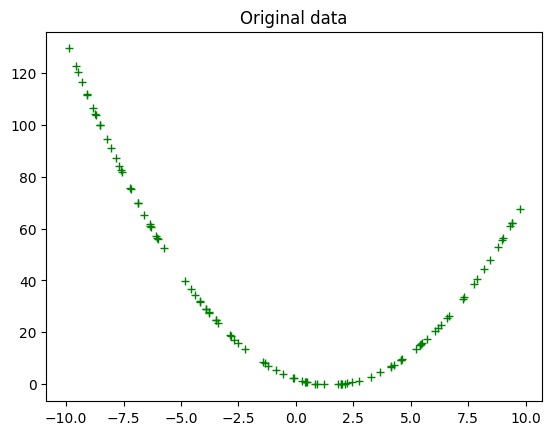

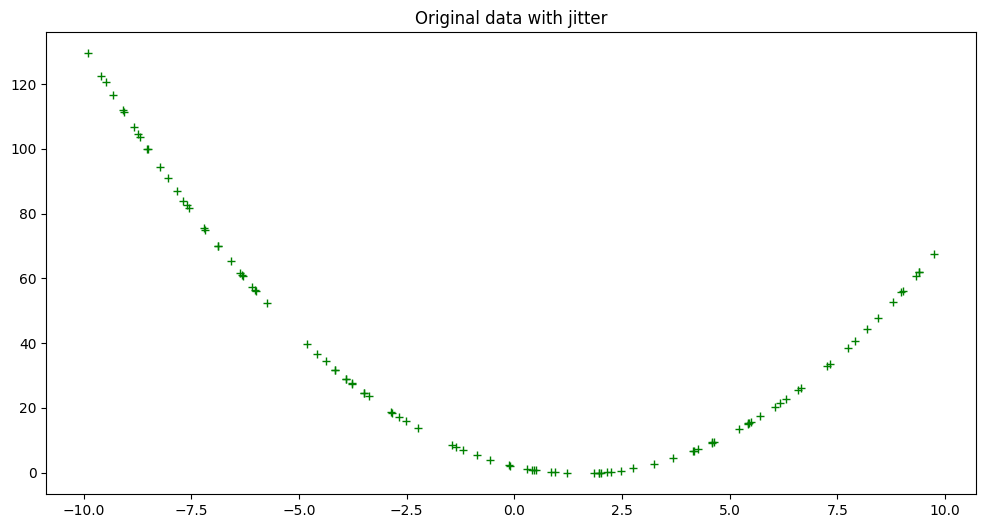

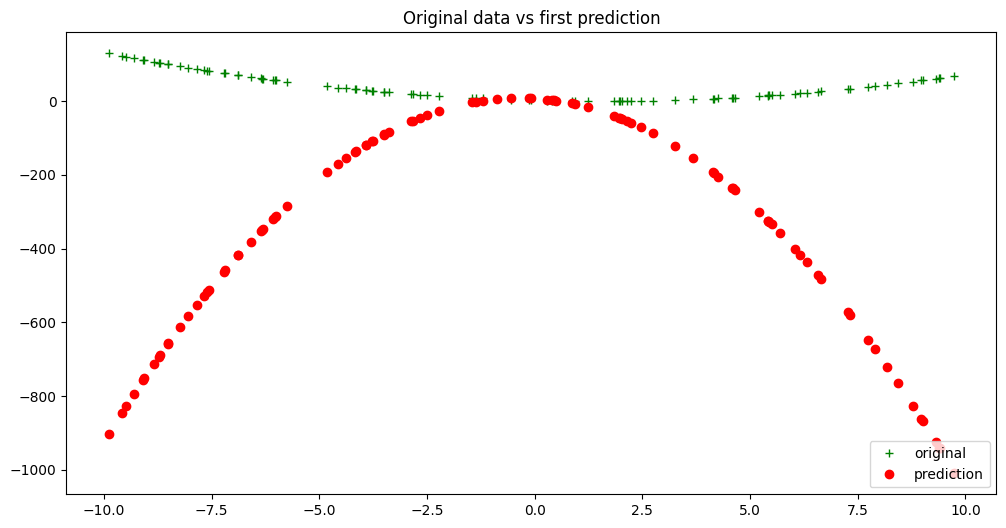

New model coeffs: (-5.37314482509839, -7.058531580724799, 7.076405716310625)
Now have smaller model loss: 82947.62923506036 vs 251394.16035390395


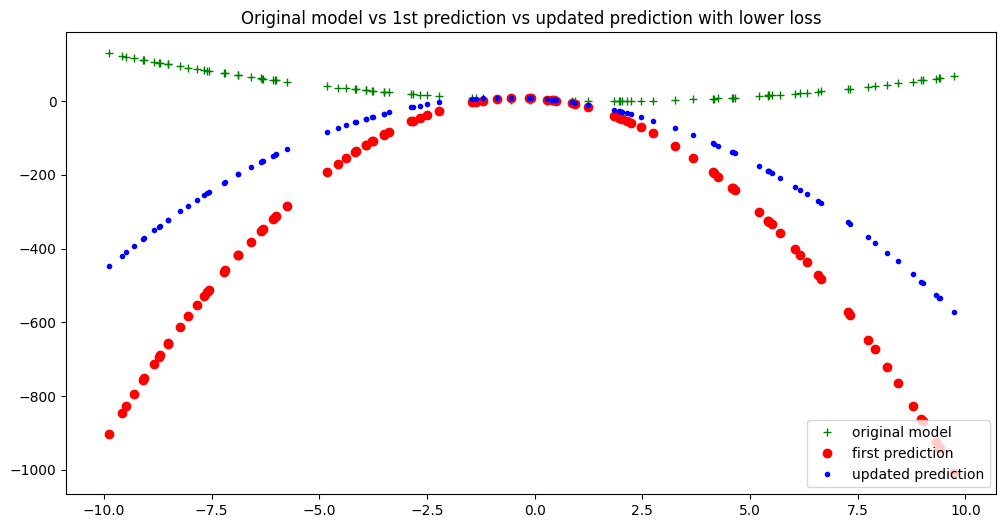

[20398.535620765015, 2135.488572942649, 672.1426398147439, 536.284910081535, 506.0897245225144, 485.0391608913303, 465.47856576276274, 446.77188189156203, 428.83858752401716, 411.6432762381392, 395.15529945027066, 379.3455303365245, 364.1860611339912, 349.6501340216457, 335.71209230676294, 322.34733499873965, 309.5322733609443, 297.24428925891857, 285.46169522309935, 274.16369615488753, 263.3303526083943, 252.94254558302896, 242.9819427647612, 233.43096615644887, 224.2727610400752, 215.4911662160925, 207.0706854673226, 198.9964601970291, 191.25424319284602, 183.83037347023674, 176.7117521510675, 169.88581933470007, 163.3405319207676, 157.064342344471, 151.0461781868529, 145.27542262404432, 139.74189568096176, 134.43583625635708, 129.34788488747938, 124.46906722391721, 119.79077818143858, 115.30476674785297, 111.00312141406111, 106.87825620457444, 102.92289728283244, 99.13007010766925, 95.49308711825182, 92.00553592574418, 88.66126799084643, 85.45438776721804, 82.37924229161553, 79.4304

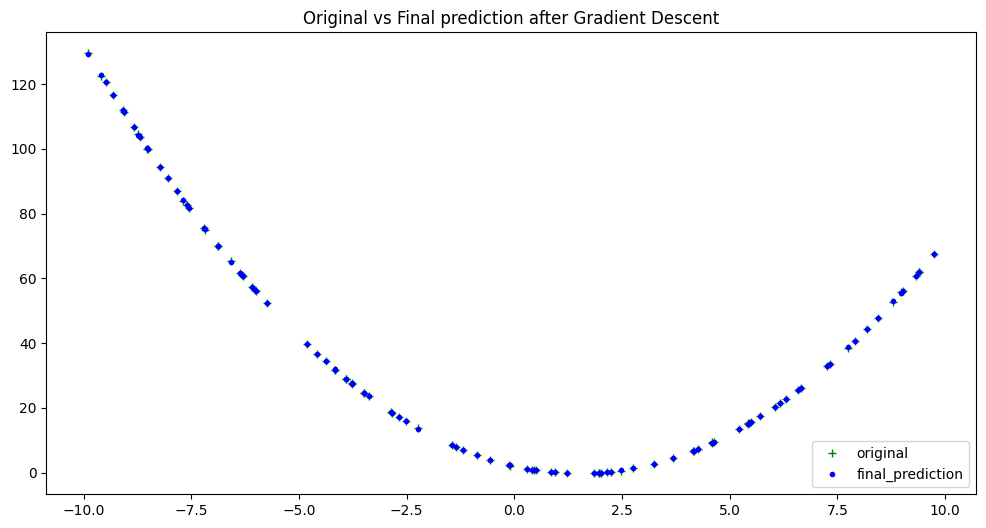

Final Coefficients predicted: (0.9998833999271489, -3.001290755356904, 2.0005495469182195)
Original Coefficients: [1, -3, 2]


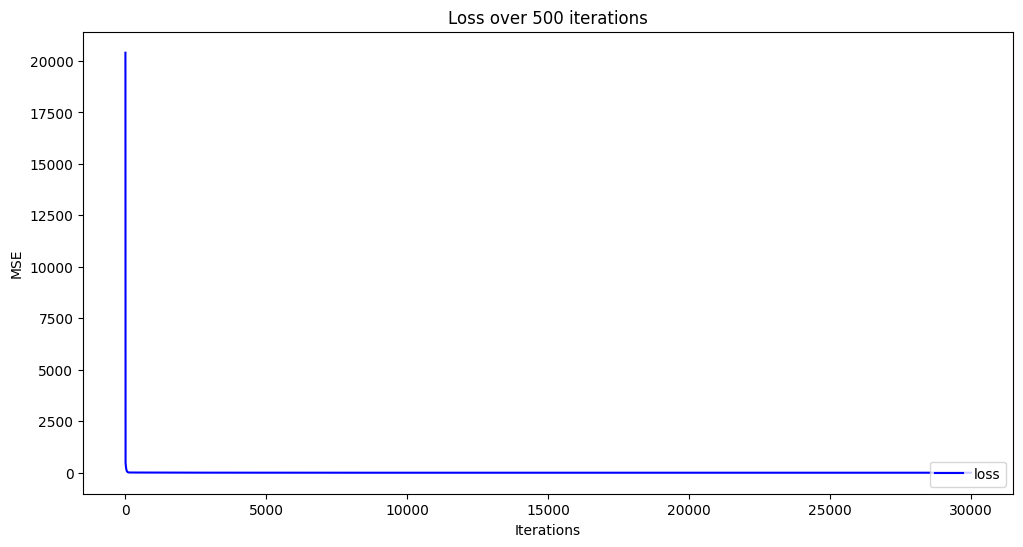

In [2]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

def eval_polynomial(coeffs, x):
    """
    Function to return the output of evaluating a polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the polynomial.

    """
    degree = len(coeffs) - 1
    y = sum(c * (x ** (degree - i)) for i, c in enumerate(coeffs))
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, -3, 2]  # Example coefficients for a second degree polynomial: y = x^2 - 3x + 2

xs = []
ys = []
for x in hundred_xs:
    y = eval_polynomial(coeffs, x)
    xs.append(x)
    ys.append(y)

plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

def eval_polynomial_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the polynomial.

    """
    y = eval_polynomial(coeffs, x)
    interval = [y - j, y + j]
    jit_val = random.uniform(interval[0], interval[1])
    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y = eval_polynomial_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)

plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """

    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    return (gradient_a, gradient_b, gradient_c)   # return calculated gradients as a a tuple of its 3 parts

calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]

new_model_coeffs = (a_new, b_new, c_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    # update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a second degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

GD = gradient_descent(30000, 0.0003)

plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()


# Rest of the code remains unchanged, you can use the functions eval_polynomial and eval_polynomial_jitter
# instead of eval_2nd_degree and eval_2nd_degree_jitter in the subsequent code.

# Continue with the rest of the code using eval_polynomial and eval_polynomial_jitter functions.


# 2] Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

In this code, learning_rates_to_test is a list containing different learning rates. The function gradient_descent_with_lr takes this list, performs gradient descent for each learning rate, and plots the loss over iterations for each learning rate.

<ipython-input-2-ea95772ecb3c>:82: RuntimeWarning: overflow encountered in double_scalars
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-2-ea95772ecb3c>:82: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-2-ea95772ecb3c>:188: RuntimeWarning: overflow encountered in double_scalars
  gradient_a = (-2 / n) * sum(a_s)
<ipython-input-2-ea95772ecb3c>:189: RuntimeWarning: invalid value encountered in double_scalars
  gradient_b = (-2 / n) * sum(b_s)
<ipython-input-2-ea95772ecb3c>:193: RuntimeWarning: invalid value encountered in double_scalars
  a_new = coeffs[0] - lr * gradient_a
<ipython-input-2-ea95772ecb3c>:178: RuntimeWarning: overflow encountered in double_scalars
  partial_a = x_squared * (y - y_bar)
<ipython-input-2-ea95772ecb3c>:180: RuntimeWarning: overflow encountered in double_scalars
  partial_b = x * (y - y_bar)
<ipython-input-2-ea95772ecb3c>:190: RuntimeWarning: overflow encountered in doubl

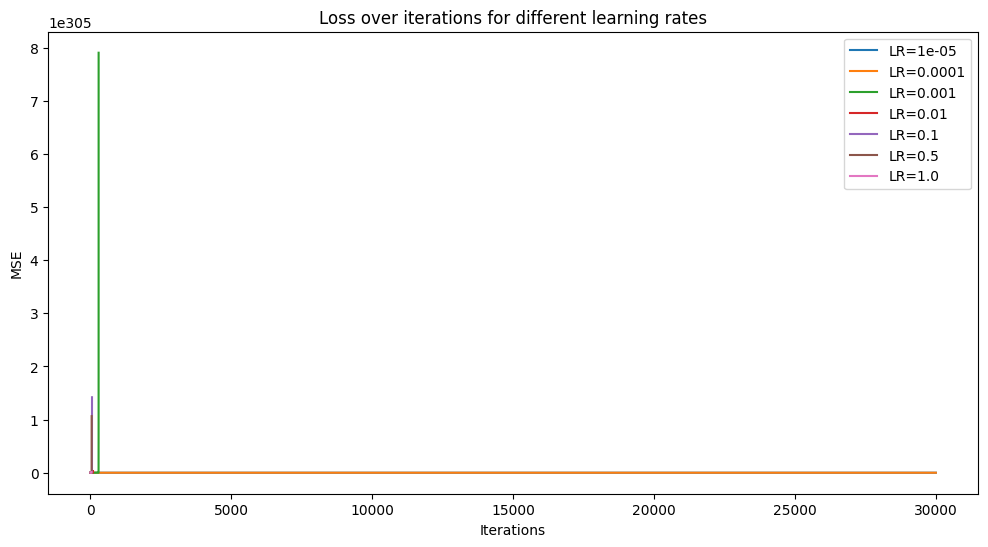

In [3]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

# ... (Previous code remains unchanged)

def gradient_descent_with_lr(epochs, lr_list):
    """
    Perform gradient descent for a second degree polynomial with different learning rates.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updating loss.
        lr_list: list of learning rates to experiment with

    Returns: List of tuples containing (learning_rate, updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    results = []
    for lr in lr_list:
        losses = []
        rand_coeffs_to_test = rand_coeffs
        for i in range(epochs):
            loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
            rand_coeffs_to_test = loss[1]
            losses.append(loss[0])
        results.append((lr, loss[0], loss[1], loss[2], losses))
    return results

# Test with different learning rates
learning_rates_to_test = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0]
results = gradient_descent_with_lr(30000, learning_rates_to_test)

# Plotting results
plt.figure(figsize=(12, 6))
for lr, loss_data in zip(learning_rates_to_test, results):
    plt.plot(loss_data[4], label=f'LR={lr}')

plt.title('Loss over iterations for different learning rates')
plt.legend(loc="upper right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()


# 3] Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of  x2 ?

Now, regarding the question of initialization, the impact of initialization can be more pronounced for higher-degree polynomials. For a quadratic function (
�
2
x
2
 ), there is a unique global minimum, and gradient descent typically converges to that minimum regardless of the initialization.

However, for higher-degree polynomials, there might be multiple local minima, and the convergence behavior can depend on the initialization. Different initializations might lead the optimization algorithm to converge to different local minima. The existence of multiple roots and the complexity of the polynomial can make the optimization landscape more intricate.

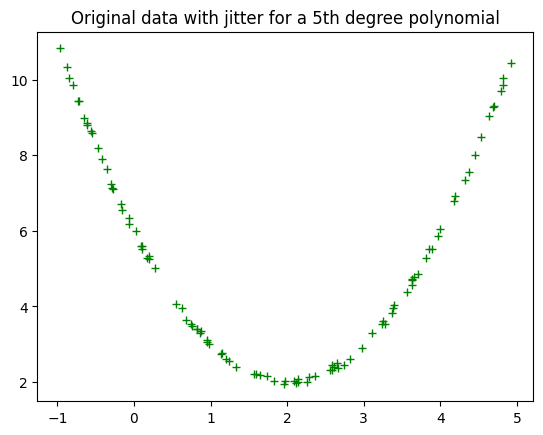

[11486.74767759951, 10125.276031103358, 8925.195188385407, 7867.373636762786, 6934.947742333906, 6113.0529121582795, 5388.5866248827715, 4749.999552079983, 4187.111440382718, 3690.9488192318877, 3253.601946996275, 2868.0987149180955, 2528.293498677771, 2228.7691856642377, 1964.7508160825234, 1732.029461176544, 1526.895125043826, 1346.0776003717558, 1186.6943352253343, 1046.2044797856736, 922.3683804584024, 813.2118756124364, 716.9948237564922, 632.1833624337054, 557.4254555893166, 491.5293395908069, 433.4445242897719, 382.24504624699335, 337.1147071458274, 297.3340620666521, 262.2689501911685, 231.36038509456074, 204.1156434578873, 180.1004101381412, 158.93185437371858, 140.2725267470862, 123.82497961082896, 109.32702521662492, 96.54755595286458, 85.28286005769841, 75.35337407309498, 66.60082026796394, 58.885683395520644, 52.08498655969358, 46.090330733729814, 40.806166677264464, 36.14827170298451, 32.04240700970206, 28.4231341772198, 25.232771955705317, 22.420476718848775, 19.94143192

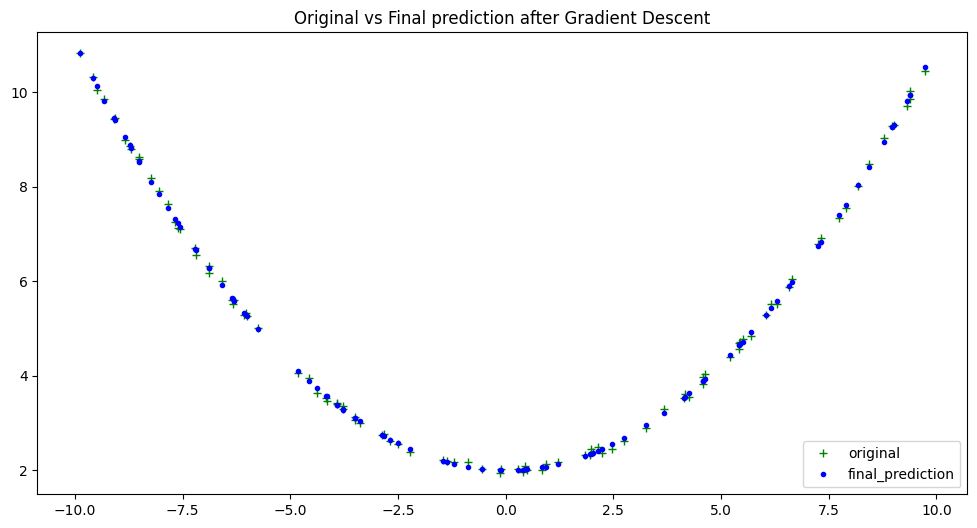

Final Coefficients predicted: (1.0013644399598753, -4.008226211104201, 6.009925964409813)
Original Coefficients: [1, -3, 2]


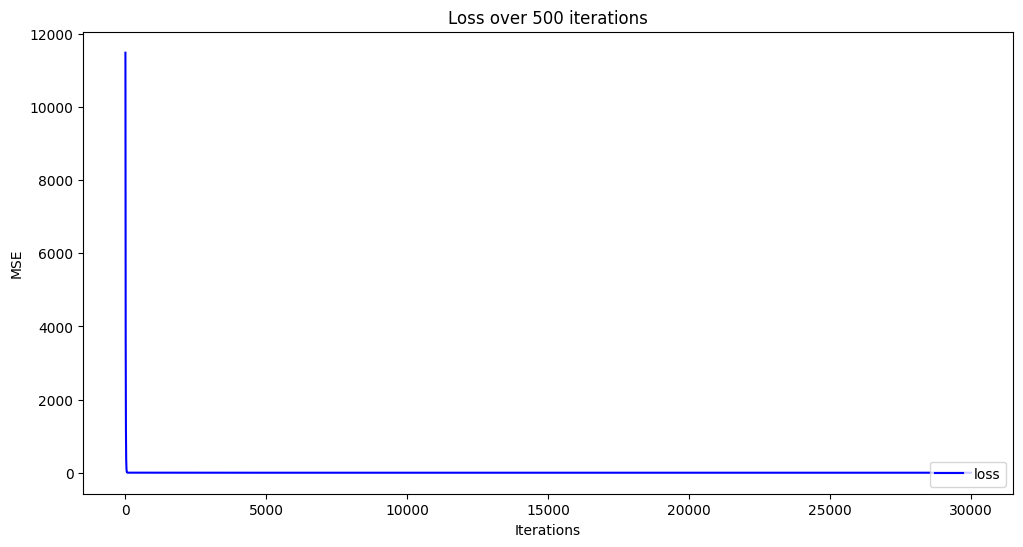

In [4]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

def eval_5th_degree(coeffs, x):
    """
    Function to return the output of evaluating a fifth degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, c, d, e, and f for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the fifth degree polynomial.

    """
    a = coeffs[0] * (x ** 5)
    b = coeffs[1] * (x ** 4)
    c = coeffs[2] * (x ** 3)
    d = coeffs[3] * (x ** 2)
    e = coeffs[4] * x
    f = coeffs[5]
    y = a + b + c + d + e + f
    return y

# ... (Rest of the code remains unchanged)

# Test with a fifth-degree polynomial
degree_5_coeffs = [1, -4, 6, -4, 1, 0]  # Example coefficients with roots at 0, 1, 2, 3, and 4

# Generate data points
hundred_xs = np.random.uniform(-1, 5, 100)

# Evaluate the fifth degree polynomial without noise
ys_true = [eval_5th_degree(degree_5_coeffs, x) for x in hundred_xs]

# Add jitter to the data
ys = [eval_2nd_degree_jitter(degree_5_coeffs, x, 0.1) for x in hundred_xs]

plt.plot(hundred_xs, ys, 'g+')
plt.title('Original data with jitter for a 5th degree polynomial')
plt.show()

def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a second degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

GD = gradient_descent(30000, 0.0003)

plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()


# 4] Can you modify the algorithm to find a maxima of a function, instead of a minima?

In [5]:
def calc_gradient_2nd_poly_for_GD_max(coeffs, inputs_x, outputs_y, lr):
    """
    Calculates the gradient for a second degree polynomial to find the maximum.

    Args:
        coeffs: a, b, and c for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a, b, c respectively.

    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x, y, y_bar in list(zip(inputs_x, outputs_y, y_bars)):
        x_squared = x ** 2
        partial_a = x_squared * (y_bar - y)  # Change the sign here
        a_s.append(partial_a)
        partial_b = x * (y_bar - y)  # Change the sign here
        b_s.append(partial_b)
        partial_c = (y_bar - y)  # Change the sign here
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (2 / n) * sum(a_s)  # Change the sign here
    gradient_b = (2 / n) * sum(b_s)  # Change the sign here
    gradient_c = (2 / n) * sum(c_s)  # Change the sign here

    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    # Update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

def gradient_descent_max(epochs, lr):
    """
    Perform gradient descent for a second degree polynomial to find the maximum.

    Args:
        epochs: number of iterations to perform finding new coefficients and updating loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD_max(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

GD_max = gradient_descent_max(30000, 0.0003)


[11486.74767759951, 10125.276031103358, 8925.195188385407, 7867.373636762786, 6934.947742333906, 6113.0529121582795, 5388.5866248827715, 4749.999552079983, 4187.111440382718, 3690.9488192318877, 3253.601946996275, 2868.0987149180955, 2528.293498677771, 2228.7691856642377, 1964.7508160825234, 1732.029461176544, 1526.895125043826, 1346.0776003717558, 1186.6943352253343, 1046.2044797856736, 922.3683804584024, 813.2118756124364, 716.9948237564922, 632.1833624337054, 557.4254555893166, 491.5293395908069, 433.4445242897719, 382.24504624699335, 337.1147071458274, 297.3340620666521, 262.2689501911685, 231.36038509456074, 204.1156434578873, 180.1004101381412, 158.93185437371858, 140.2725267470862, 123.82497961082896, 109.32702521662492, 96.54755595286458, 85.28286005769841, 75.35337407309498, 66.60082026796394, 58.885683395520644, 52.08498655969358, 46.090330733729814, 40.806166677264464, 36.14827170298451, 32.04240700970206, 28.4231341772198, 25.232771955705317, 22.420476718848775, 19.94143192